In [72]:
# AM clean vs ground truth (am_gt_3.csv)
# Basic structure + distribution comparisons

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [73]:
# Paths
clean_path = "C:/Users/HELIOS-300/Desktop/WAVES/AM Full Code/Cameron_AM_Clean.csv"
gt_path = "C:/Users/HELIOS-300/Desktop/Data/am_gt_3.csv"

clean_df = pd.read_csv(clean_path)
gt_df = pd.read_csv(gt_path)

clean_df.head()

C:\Users\HELIOS-300\AppData\Local\Temp\ipykernel_25756\4018465121.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv(clean_path)


,id,do_session,date_time,time,Modifier_1,Modifier_2,Modifier_3,Modifier_4,Comment,Activity_Type,posture_wbm,broad_domain,waves_domain,posture_broad,posture_waves
0,1.0,DO1,2018-03-07 13:30:26,13:30:26,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
1,1.0,DO1,2018-03-07 13:30:27,13:30:27,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
2,1.0,DO1,2018-03-07 13:30:28,13:30:28,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
3,1.0,DO1,2018-03-07 13:30:29,13:30:29,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
4,1.0,DO1,2018-03-07 13:30:30,13:30:30,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move


In [74]:
# Basic structure
print("Clean shape:", clean_df.shape)
print("GT shape:", gt_df.shape)

print("\nClean dtypes:")
print(clean_df.dtypes.to_string())

print("\nGT dtypes:")
print(gt_df.dtypes.to_string())

print("\nClean missing (top 15):")
print(clean_df.isna().sum().sort_values(ascending=False).head(15).to_string())

print("\nGT missing (top 15):")
print(gt_df.isna().sum().sort_values(ascending=False).head(15).to_string())

common_cols = [c for c in clean_df.columns if c in gt_df.columns]
print("\nCommon columns:", common_cols)

gt_df.head()

Clean shape: (424022, 15)
GT shape: (332985, 16)

Clean dtypes:
id               float64
do_session        object
date_time         object
time              object
Modifier_1        object
Modifier_2        object
Modifier_3        object
Modifier_4        object
Comment           object
Activity_Type     object
posture_wbm       object
broad_domain      object
waves_domain      object
posture_broad     object
posture_waves     object

GT dtypes:
day                  object
id                   object
actual_time          object
time                 object
coding               object
primary_behavior     object
primary_posture      object
primary_upperbody    object
primary_intensity    object
num_postures          int64
transition            int64
posture_coding       object
broad_activity       object
detailed_activity    object
updated_activity     object
DO_session           object

Clean missing (top 15):
Modifier_2       357069
Modifier_4       330396
Comment          152803
broa

,day,id,actual_time,time,coding,primary_behavior,primary_posture,primary_upperbody,primary_intensity,num_postures,transition,posture_coding,broad_activity,detailed_activity,updated_activity,DO_session
0,7/24/2017,AM02,13:17:10,13H 17M 10S,non-sed,HA- housework,private/not coded,unknown,private/not coded,1,0,private/not coded,private/not coded,private/not coded,private/not coded,DO1
1,7/24/2017,AM02,13:17:11,13H 17M 11S,non-sed,HA- housework,private/not coded,unknown,private/not coded,1,0,private/not coded,private/not coded,private/not coded,private/not coded,DO1
2,7/24/2017,AM02,13:17:12,13H 17M 12S,non-sed,HA- housework,private/not coded,unknown,private/not coded,1,0,private/not coded,private/not coded,private/not coded,private/not coded,DO1
3,7/24/2017,AM02,13:17:13,13H 17M 13S,non-sed,HA- housework,private/not coded,unknown,private/not coded,1,0,private/not coded,private/not coded,private/not coded,private/not coded,DO1
4,7/24/2017,AM02,13:17:14,13H 17M 14S,non-sed,HA- housework,LA- stand and move with upper body movement,unknown,light,2,1,LA- stand and move light,mixed-activity,housework,mixed-activity,DO1


In [75]:
# Helpers for distribution comparisons

def normalized_counts(series):
    return series.value_counts(dropna=False, normalize=True)


def plot_top_bar(clean_series, gt_series, title, top_n=12):
    c = normalized_counts(clean_series)
    g = normalized_counts(gt_series)

    # union of top categories
    top = pd.Index(c.head(top_n).index).union(g.head(top_n).index)
    comp = pd.DataFrame({"clean": c.reindex(top).fillna(0), "gt": g.reindex(top).fillna(0)})

    ax = comp.plot(kind="bar", figsize=(10, 4), title=title)
    ax.set_ylabel("Proportion")
    plt.tight_layout()
    plt.show()


def plot_pie_side_by_side(clean_series, gt_series, title, top_n=10):
    def _prep(s):
        counts = s.value_counts(dropna=False)
        if len(counts) > top_n:
            top = counts.head(top_n)
            other = counts.iloc[top_n:].sum()
            top = top.copy()
            top.loc["Other"] = other
            return top
        return counts

    c = _prep(clean_series)
    g = _prep(gt_series)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].pie(c.values, labels=c.index, autopct="%1.1f%%")
    axes[0].set_title(f"Clean: {title}")
    axes[1].pie(g.values, labels=g.index, autopct="%1.1f%%")
    axes[1].set_title(f"GT: {title}")
    plt.tight_layout()
    plt.show()

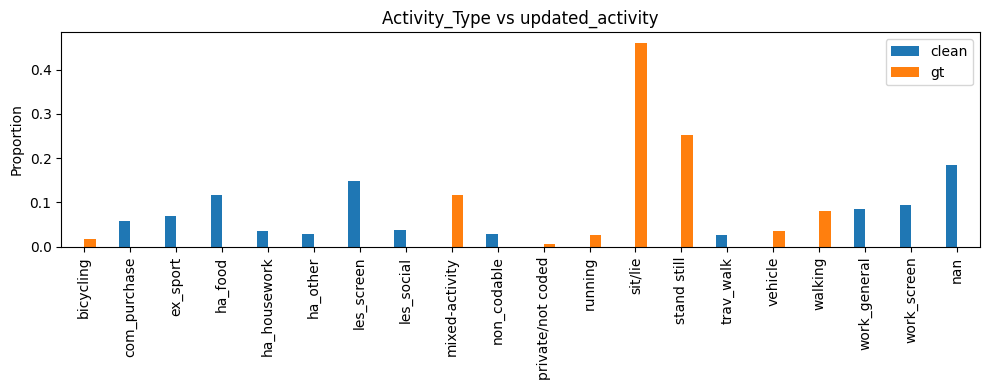

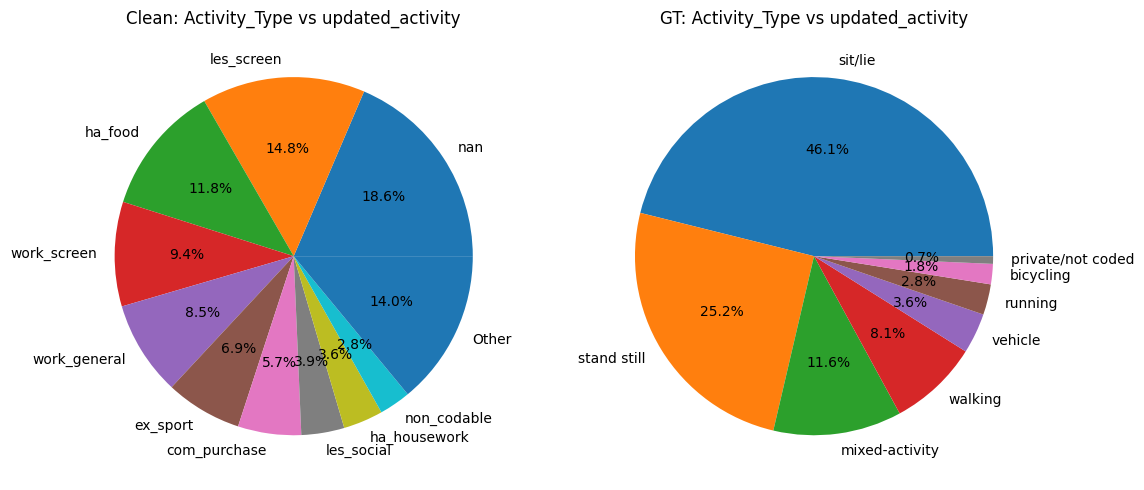

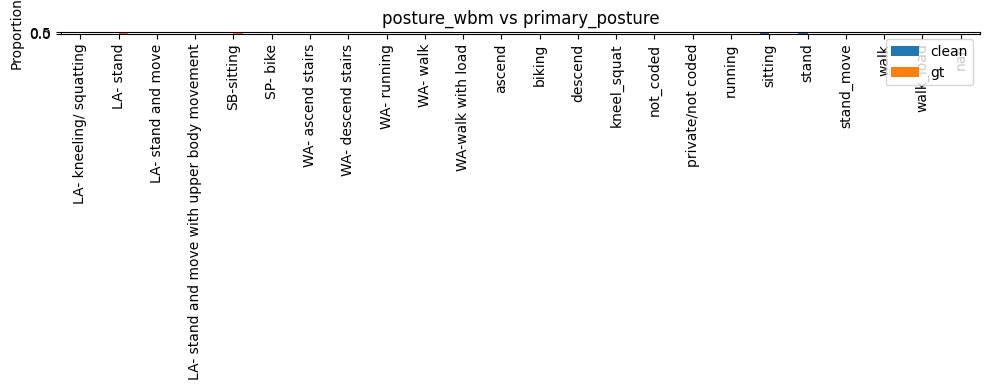

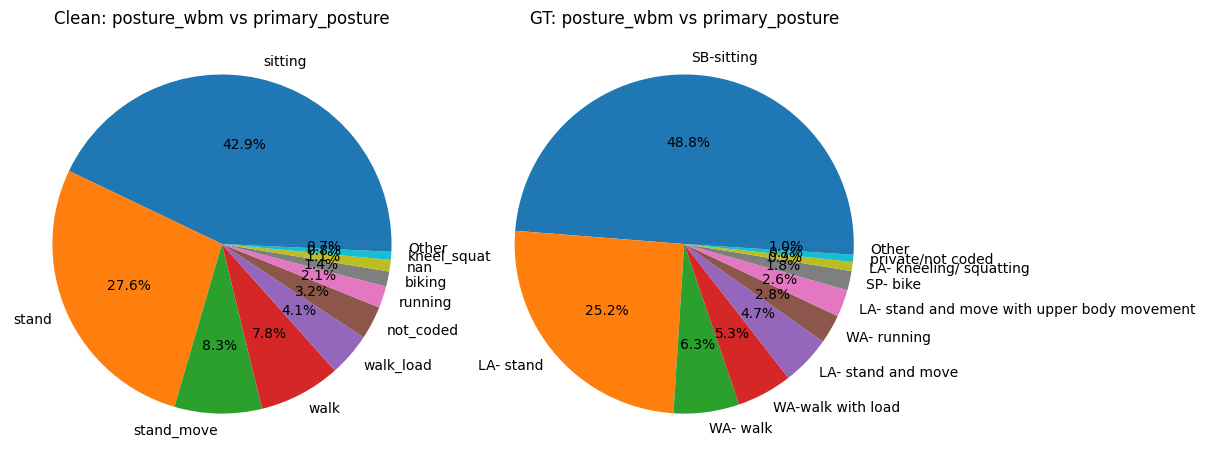

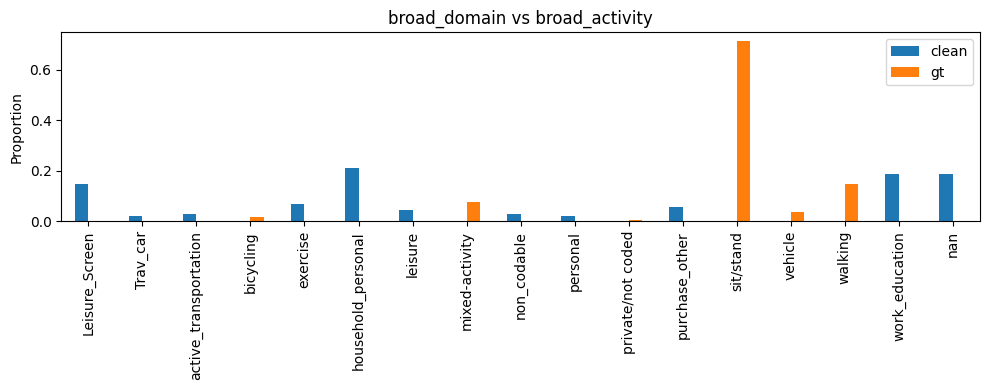

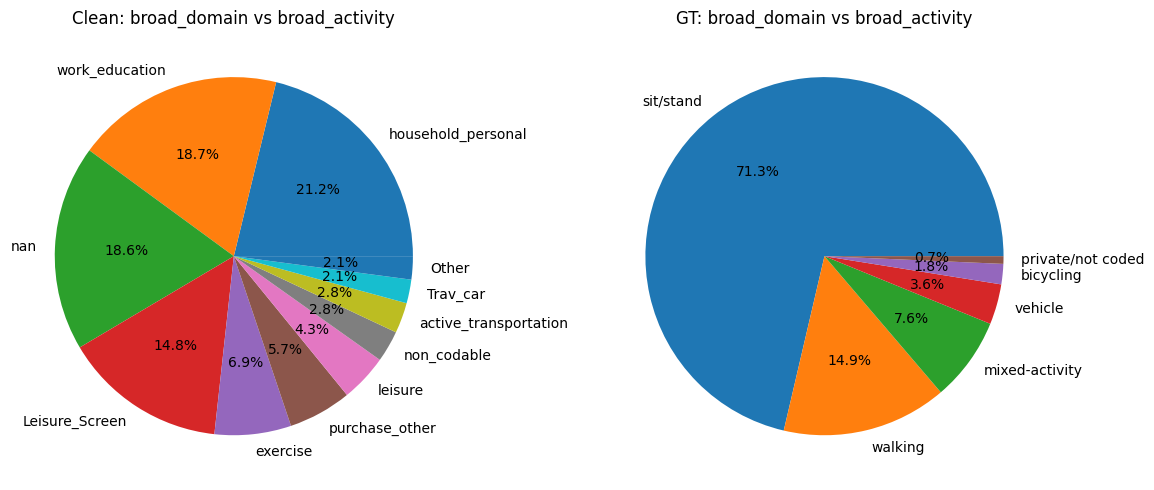

In [76]:
# Distribution comparisons (best-aligned columns)
# Activity: clean Activity_Type vs gt updated_activity
# Posture: clean posture_wbm vs gt primary_posture
# Broad: clean broad_domain vs gt broad_activity

if "Activity_Type" in clean_df.columns and "updated_activity" in gt_df.columns:
    plot_top_bar(clean_df["Activity_Type"], gt_df["updated_activity"], "Activity_Type vs updated_activity")
    plot_pie_side_by_side(clean_df["Activity_Type"], gt_df["updated_activity"], "Activity_Type vs updated_activity")

if "posture_wbm" in clean_df.columns and "primary_posture" in gt_df.columns:
    plot_top_bar(clean_df["posture_wbm"], gt_df["primary_posture"], "posture_wbm vs primary_posture")
    plot_pie_side_by_side(clean_df["posture_wbm"], gt_df["primary_posture"], "posture_wbm vs primary_posture")

if "broad_domain" in clean_df.columns and "broad_activity" in gt_df.columns:
    plot_top_bar(clean_df["broad_domain"], gt_df["broad_activity"], "broad_domain vs broad_activity")
    plot_pie_side_by_side(clean_df["broad_domain"], gt_df["broad_activity"], "broad_domain vs broad_activity")

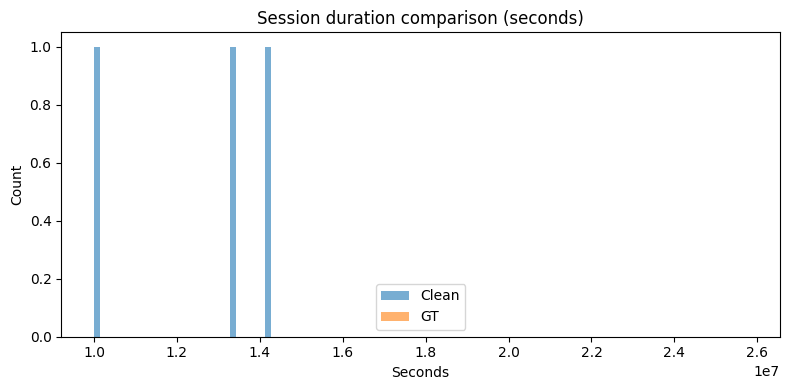

In [77]:
# Total time comparison (session duration)
# Clean: use date_time + do_session
# GT: use day + actual_time + DO_session

if "date_time" in clean_df.columns and "do_session" in clean_df.columns:
    clean_df["_dt"] = pd.to_datetime(clean_df["date_time"], errors="coerce")
    clean_span = clean_df.groupby("do_session", dropna=False)["_dt"].agg(min_dt="min", max_dt="max")
    clean_span["span_s"] = (clean_span["max_dt"] - clean_span["min_dt"]).dt.total_seconds()
else:
    clean_span = None

if "day" in gt_df.columns and "actual_time" in gt_df.columns and "DO_session" in gt_df.columns:
    gt_df["_dt"] = pd.to_datetime(gt_df["day"].astype(str) + " " + gt_df["actual_time"].astype(str), errors="coerce")
    gt_span = gt_df.groupby("DO_session", dropna=False)["_dt"].agg(min_dt="min", max_dt="max")
    gt_span["span_s"] = (gt_span["max_dt"] - gt_span["min_dt"]).dt.total_seconds()
else:
    gt_span = None

if clean_span is not None and gt_span is not None:
    plt.figure(figsize=(8, 4))
    plt.hist(clean_span["span_s"].dropna(), bins=30, alpha=0.6, label="Clean")
    plt.hist(gt_span["span_s"].dropna(), bins=30, alpha=0.6, label="GT")
    plt.title("Session duration comparison (seconds)")
    plt.xlabel("Seconds")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Missing date/time fields for duration comparison.")

In [78]:
# AM clean vs ground truth comparison (am_gt_3.csv)
# Base analysis + distribution comparisons

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [79]:
# Paths
clean_path = "C:/Users/HELIOS-300/Desktop/WAVES/AM Full Code/Cameron_AM_Clean.csv"
gt_path = "C:/Users/HELIOS-300/Desktop/Data/am_gt_3.csv"

clean_df = pd.read_csv(clean_path)
gt_df = pd.read_csv(gt_path)

clean_df.head()

C:\Users\HELIOS-300\AppData\Local\Temp\ipykernel_25756\4018465121.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv(clean_path)


,id,do_session,date_time,time,Modifier_1,Modifier_2,Modifier_3,Modifier_4,Comment,Activity_Type,posture_wbm,broad_domain,waves_domain,posture_broad,posture_waves
0,1.0,DO1,2018-03-07 13:30:26,13:30:26,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
1,1.0,DO1,2018-03-07 13:30:27,13:30:27,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
2,1.0,DO1,2018-03-07 13:30:28,13:30:28,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
3,1.0,DO1,2018-03-07 13:30:29,13:30:29,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
4,1.0,DO1,2018-03-07 13:30:30,13:30:30,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move


In [80]:
# Base analysis of gt_df
print("GT shape:", gt_df.shape)
print("Clean shape:", clean_df.shape)

print("\nGT columns:")
print(gt_df.dtypes.to_string())

print("\nClean columns:")
print(clean_df.dtypes.to_string())

# Quick missingness overview
print("\nGT missing (top 15):")
print(gt_df.isna().sum().sort_values(ascending=False).head(15).to_string())

print("\nClean missing (top 15):")
print(clean_df.isna().sum().sort_values(ascending=False).head(15).to_string())

GT shape: (332985, 16)
Clean shape: (424022, 15)

GT columns:
day                  object
id                   object
actual_time          object
time                 object
coding               object
primary_behavior     object
primary_posture      object
primary_upperbody    object
primary_intensity    object
num_postures          int64
transition            int64
posture_coding       object
broad_activity       object
detailed_activity    object
updated_activity     object
DO_session           object

Clean columns:
id               float64
do_session        object
date_time         object
time              object
Modifier_1        object
Modifier_2        object
Modifier_3        object
Modifier_4        object
Comment           object
Activity_Type     object
posture_wbm       object
broad_domain      object
waves_domain      object
posture_broad     object
posture_waves     object

GT missing (top 15):
primary_behavior     33
day                   0
actual_time           0
id   

In [81]:
# Identify comparable columns
common_cols = [c for c in clean_df.columns if c in gt_df.columns]
print("Common columns:", common_cols)

preferred_cols = [
    "Activity_Type",
    "posture_wbm",
    "broad_domain",
    "waves_domain",
    "posture_broad",
    "posture_waves",
]

compare_cols = [c for c in preferred_cols if c in common_cols]
if not compare_cols:
    compare_cols = [c for c in common_cols if clean_df[c].dtype == "object"][:5]

print("Columns for distribution comparison:", compare_cols)


def compare_counts(a_df, b_df, col, normalize=True):
    a = a_df[col].value_counts(dropna=False, normalize=normalize)
    b = b_df[col].value_counts(dropna=False, normalize=normalize)
    comp = pd.concat([a, b], axis=1)
    comp.columns = ["clean", "gt"]
    comp = comp.fillna(0).sort_values("clean", ascending=False)
    return comp

for col in compare_cols:
    print("\n====", col, "====")
    comp = compare_counts(clean_df, gt_df, col, normalize=True)
    display(comp.head(30))

Common columns: ['id', 'time']
Columns for distribution comparison: ['time']

==== time ====


,clean,gt
time,,
14:31:20,0.00004,0.0
14:30:56,0.00004,0.0
14:30:55,0.00004,0.0
14:30:54,0.00004,0.0
14:32:19,0.00004,0.0
14:32:20,0.00004,0.0
14:31:49,0.00004,0.0
14:31:50,0.00004,0.0
14:31:51,0.00004,0.0


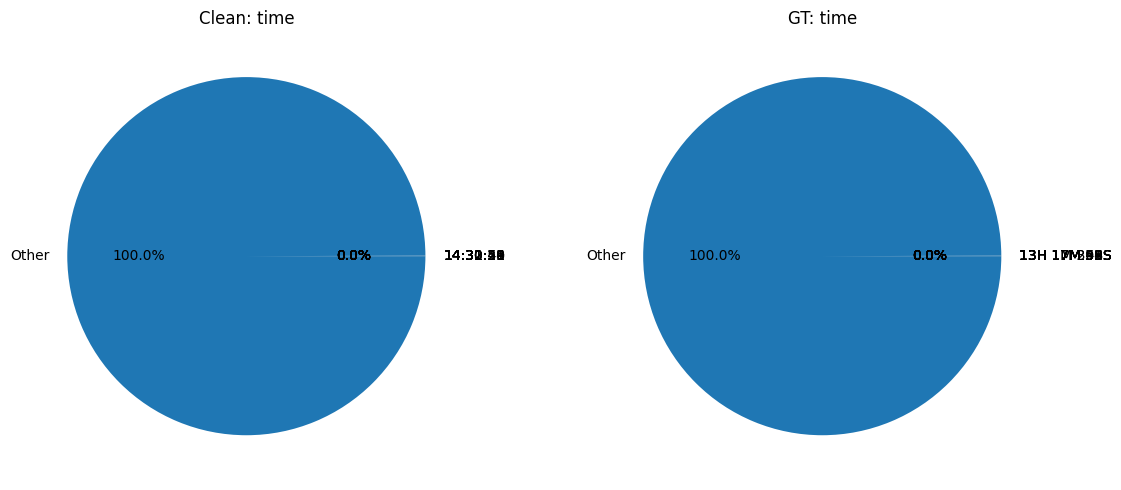

In [82]:
# Side-by-side pie charts (top categories)

def pie_compare(clean_df, gt_df, col, top_n=10):
    c = clean_df[col].value_counts(dropna=False)
    g = gt_df[col].value_counts(dropna=False)

    def _prep(series):
        if len(series) > top_n:
            top = series.head(top_n)
            other = series.iloc[top_n:].sum()
            top = top.copy()
            top.loc["Other"] = other
            return top
        return series

    c = _prep(c)
    g = _prep(g)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].pie(c.values, labels=c.index, autopct="%1.1f%%")
    axes[0].set_title(f"Clean: {col}")
    axes[1].pie(g.values, labels=g.index, autopct="%1.1f%%")
    axes[1].set_title(f"GT: {col}")
    plt.tight_layout()
    plt.show()

for col in compare_cols:
    pie_compare(clean_df, gt_df, col, top_n=10)

In [83]:
# Total time comparison (if date_time exists in both)
if "date_time" in clean_df.columns and "date_time" in gt_df.columns:
    clean_df["_abs_dt"] = pd.to_datetime(clean_df["date_time"], errors="coerce")
    gt_df["_abs_dt"] = pd.to_datetime(gt_df["date_time"], errors="coerce")

    clean_span = clean_df.groupby("do_session", dropna=False)["_abs_dt"].agg(min_dt="min", max_dt="max")
    clean_span["span_s"] = (clean_span["max_dt"] - clean_span["min_dt"]).dt.total_seconds()

    gt_group_col = "do_session" if "do_session" in gt_df.columns else "Observation"
    gt_span = gt_df.groupby(gt_group_col, dropna=False)["_abs_dt"].agg(min_dt="min", max_dt="max")
    gt_span["span_s"] = (gt_span["max_dt"] - gt_span["min_dt"]).dt.total_seconds()

    plt.figure(figsize=(8, 4))
    plt.hist(clean_span["span_s"].dropna(), bins=30, alpha=0.6, label="Clean")
    plt.hist(gt_span["span_s"].dropna(), bins=30, alpha=0.6, label="GT")
    plt.title("Session duration comparison (seconds)")
    plt.xlabel("Seconds")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("date_time column not found in both datasets; skipping duration comparison.")

date_time column not found in both datasets; skipping duration comparison.


In [84]:
# AM clean vs ground truth comparison (am_gt_3.csv)
# Base analysis + distribution comparisons

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [85]:
# Paths
clean_path = "C:/Users/HELIOS-300/Desktop/WAVES/AM Full Code/Cameron_AM_Clean.csv"
gt_path = "C:/Users/HELIOS-300/Desktop/Data/am_gt_3.csv"

clean_df = pd.read_csv(clean_path)
gt_df = pd.read_csv(gt_path)

clean_df.head()

C:\Users\HELIOS-300\AppData\Local\Temp\ipykernel_25756\4018465121.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_df = pd.read_csv(clean_path)


,id,do_session,date_time,time,Modifier_1,Modifier_2,Modifier_3,Modifier_4,Comment,Activity_Type,posture_wbm,broad_domain,waves_domain,posture_broad,posture_waves
0,1.0,DO1,2018-03-07 13:30:26,13:30:26,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
1,1.0,DO1,2018-03-07 13:30:27,13:30:27,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
2,1.0,DO1,2018-03-07 13:30:28,13:30:28,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
3,1.0,DO1,2018-03-07 13:30:29,13:30:29,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
4,1.0,DO1,2018-03-07 13:30:30,13:30:30,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move


In [86]:
# Base analysis of gt_df
print("GT shape:", gt_df.shape)
print("Clean shape:", clean_df.shape)

print("\nGT columns:")
print(gt_df.dtypes.to_string())

print("\nClean columns:")
print(clean_df.dtypes.to_string())

# Quick missingness overview
print("\nGT missing (top 15):")
print(gt_df.isna().sum().sort_values(ascending=False).head(15).to_string())

print("\nClean missing (top 15):")
print(clean_df.isna().sum().sort_values(ascending=False).head(15).to_string())

GT shape: (332985, 16)
Clean shape: (424022, 15)

GT columns:
day                  object
id                   object
actual_time          object
time                 object
coding               object
primary_behavior     object
primary_posture      object
primary_upperbody    object
primary_intensity    object
num_postures          int64
transition            int64
posture_coding       object
broad_activity       object
detailed_activity    object
updated_activity     object
DO_session           object

Clean columns:
id               float64
do_session        object
date_time         object
time              object
Modifier_1        object
Modifier_2        object
Modifier_3        object
Modifier_4        object
Comment           object
Activity_Type     object
posture_wbm       object
broad_domain      object
waves_domain      object
posture_broad     object
posture_waves     object

GT missing (top 15):
primary_behavior     33
day                   0
actual_time           0
id   

In [87]:
# Identify comparable columns
common_cols = [c for c in clean_df.columns if c in gt_df.columns]
print("Common columns:", common_cols)

# Choose likely categorical comparison columns
preferred_cols = [
    "Activity_Type",
    "posture_wbm",
    "broad_domain",
    "waves_domain",
    "posture_broad",
    "posture_waves",
]

compare_cols = [c for c in preferred_cols if c in common_cols]
if not compare_cols:
    # fallback: compare first few object columns
    compare_cols = [c for c in common_cols if clean_df[c].dtype == "object"][:5]

print("Columns for distribution comparison:", compare_cols)


def compare_counts(a_df, b_df, col, normalize=True):
    a = a_df[col].value_counts(dropna=False, normalize=normalize)
    b = b_df[col].value_counts(dropna=False, normalize=normalize)
    comp = pd.concat([a, b], axis=1)
    comp.columns = ["clean", "gt"]
    comp = comp.fillna(0).sort_values("clean", ascending=False)
    return comp

for col in compare_cols:
    print("\n====", col, "====")
    comp = compare_counts(clean_df, gt_df, col, normalize=True)
    display(comp.head(30))

Common columns: ['id', 'time']
Columns for distribution comparison: ['time']

==== time ====


,clean,gt
time,,
14:31:20,0.00004,0.0
14:30:56,0.00004,0.0
14:30:55,0.00004,0.0
14:30:54,0.00004,0.0
14:32:19,0.00004,0.0
14:32:20,0.00004,0.0
14:31:49,0.00004,0.0
14:31:50,0.00004,0.0
14:31:51,0.00004,0.0


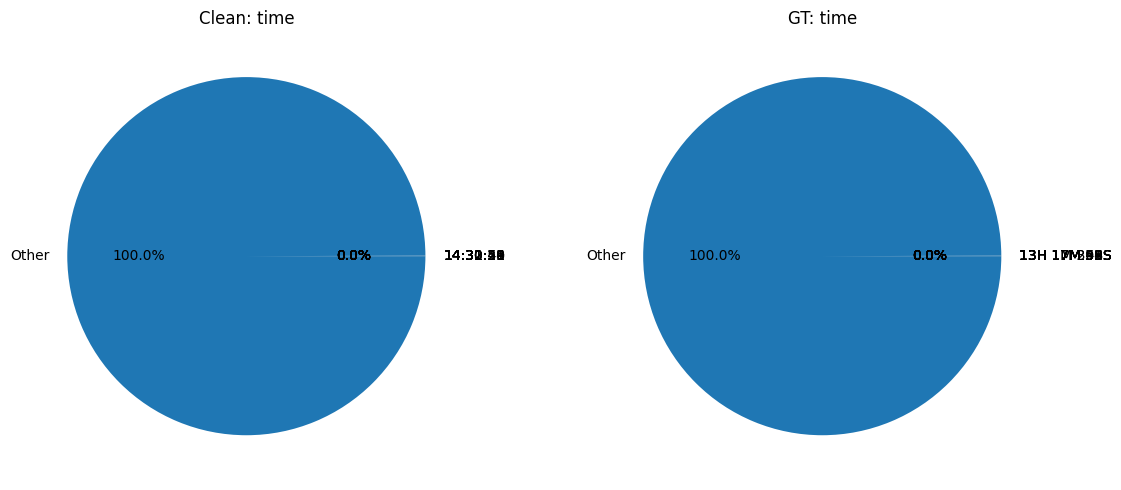

In [88]:
# Side-by-side pie charts (top categories)

def pie_compare(clean_df, gt_df, col, top_n=10):
    c = clean_df[col].value_counts(dropna=False)
    g = gt_df[col].value_counts(dropna=False)

    def _prep(series):
        if len(series) > top_n:
            top = series.head(top_n)
            other = series.iloc[top_n:].sum()
            top = top.copy()
            top.loc["Other"] = other
            return top
        return series

    c = _prep(c)
    g = _prep(g)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].pie(c.values, labels=c.index, autopct="%1.1f%%")
    axes[0].set_title(f"Clean: {col}")
    axes[1].pie(g.values, labels=g.index, autopct="%1.1f%%")
    axes[1].set_title(f"GT: {col}")
    plt.tight_layout()
    plt.show()

for col in compare_cols:
    pie_compare(clean_df, gt_df, col, top_n=10)

In [89]:
# Total time comparison (if date_time exists in both)
if "date_time" in clean_df.columns and "date_time" in gt_df.columns:
    clean_df["_abs_dt"] = pd.to_datetime(clean_df["date_time"], errors="coerce")
    gt_df["_abs_dt"] = pd.to_datetime(gt_df["date_time"], errors="coerce")

    clean_span = clean_df.groupby("do_session", dropna=False)["_abs_dt"].agg(min_dt="min", max_dt="max")
    clean_span["span_s"] = (clean_span["max_dt"] - clean_span["min_dt"]).dt.total_seconds()

    gt_group_col = "do_session" if "do_session" in gt_df.columns else "Observation"
    gt_span = gt_df.groupby(gt_group_col, dropna=False)["_abs_dt"].agg(min_dt="min", max_dt="max")
    gt_span["span_s"] = (gt_span["max_dt"] - gt_span["min_dt"]).dt.total_seconds()

    plt.figure(figsize=(8, 4))
    plt.hist(clean_span["span_s"].dropna(), bins=30, alpha=0.6, label="Clean")
    plt.hist(gt_span["span_s"].dropna(), bins=30, alpha=0.6, label="GT")
    plt.title("Session duration comparison (seconds)")
    plt.xlabel("Seconds")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("date_time column not found in both datasets; skipping duration comparison.")

date_time column not found in both datasets; skipping duration comparison.


In [90]:
# AM vs original behavior comparison
# Loads cleaned AM export and original behavior sheet,
# then compares distributions for Activity_Type and Posture.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [91]:
# Paths
clean_path = "C:/Users/HELIOS-300/Desktop/WAVES/AM Full Code/Cameron_AM_Clean.csv"
orig_path = "C:/Users/HELIOS-300/Desktop/Data/am_behposture_onesheet.xlsx"

# Load cleaned AM data
waves_df = pd.read_csv(clean_path)

# Load original behavior sheet and filter to State start (matching pipeline)
behav_df = pd.read_excel(orig_path, engine="openpyxl")
behav_df = behav_df[behav_df["Event_Type"] == "State start"].copy()

waves_df.head()

C:\Users\HELIOS-300\AppData\Local\Temp\ipykernel_25756\251077034.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  waves_df = pd.read_csv(clean_path)


,id,do_session,date_time,time,Modifier_1,Modifier_2,Modifier_3,Modifier_4,Comment,Activity_Type,posture_wbm,broad_domain,waves_domain,posture_broad,posture_waves
0,1.0,DO1,2018-03-07 13:30:26,13:30:26,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
1,1.0,DO1,2018-03-07 13:30:27,13:30:27,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
2,1.0,DO1,2018-03-07 13:30:28,13:30:28,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
3,1.0,DO1,2018-03-07 13:30:29,13:30:29,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move
4,1.0,DO1,2018-03-07 13:30:30,13:30:30,No movement,NaN,NaN,NaN,NaN,NaN,stand,NaN,NaN,active,stand_move


In [92]:
# Map Behavior -> Activity_Type and posture_wbm for the original sheet
beh_norm = behav_df["Behavior"].astype("string").str.strip().str.lower().str.replace(r"\s+", " ", regex=True)

activity_map = {
    "sl- sleep": "sleep",
    "pc- groom, health-related": "pc_groom",
    "pc- other personal care": "pc_other",
    "ha- housework": "ha_housework",
    "ha- food prep and cleanup": "ha_food",
    "ha- interior maintenance, repair, & decoration": "ha_interior",
    "ha- exterior maintenance, repair, & decoration": "ha_exterior",
    "ha- lawn, garden and houseplants": "ha_lawn",
    "ha- animals and pets": "ha_pets",
    "ha- household management/other household activities": "ha_other",
    "ca- caring for and helping children": "care_children",
    "ca- caring for and helping adults": "care_adults",
    "wrk- general": "work_general",
    "wrk- screen based": "work_screen",
    "edu- taking class, research, homework": "edu_class",
    "edu- extracurricular": "edu_other",
    "org- organizational civic, volunteer, and religious activities": "com_church",
    "org - volunteer work": "com_volunteer",
    "org- volunteer work": "com_volunteer",
    "pur- purchasing goods and services": "com_purchase",
    "eat- eating and drinking, waiting": "ha_eat",
    "les- socializing, communicating, leisure time not screen": "les_social",
    "les- screen based leisure time (tv, video game, computer)": "les_screen",
    "ex- participating in sport, exercise or recreation": "ex_sport",
    "ex- attending sport, recreational event, or performance": "les_attend",
    "trav- passenger bus or train": "trav_pass",
    "trav- driver (car/truck/motorcycle)": "trav_drive",
    "trav- biking": "trav_bike",
    "trav- walking": "trav_walk",
    "trav-walking": "trav_walk",
    "other- non codable": "non_codable",
}

posture_map = {
    "sb-sitting": "sitting",
    "sb- lying": "lying",
    "la- kneeling/ squatting": "kneel_squat",
    "la- stretching": "stretch",
    "la- stand": "stand",
    "la- stand and move": "stand_move",
    "la- stand and move with upper body movement": "stand_move",
    "la- stand and move with unidentifiable upper body movement": "stand_move",
    "wa- walk": "walk",
    "wa-walk with load": "walk_load",
    "wa- ascend stairs": "ascend",
    "wa- descend stairs": "descend",
    "wa- running": "running",
    "sp- bike": "biking",
    "sp- other sport movement": "sport_move",
    "sp- muscle strengthening": "muscle_strength",
    "sp -kick": "sport_move",
    "sp- jump": "sport_move",
    "sp- throw": "sport_move",
    "private/not coded": "not_coded",
}

behav_df["Activity_Type"] = beh_norm.map(activity_map)
behav_df["posture_wbm"] = beh_norm.map(posture_map)

# Domains (same mapping as cleaned file)
activity_domain_map = {
    "sleep": ("sleep", "sleep"),
    "pc_groom": ("household_personal", "personal"),
    "pc_other": ("household_personal", "personal"),
    "ha_housework": ("household_personal", "household"),
    "ha_food": ("household_personal", "household"),
    "ha_interior": ("household_personal", "maintenance_repair"),
    "ha_exterior": ("household_personal", "maintenance_repair"),
    "ha_lawn": ("household_personal", "lawn_garden"),
    "ha_pets": ("household_personal", "household"),
    "ha_other": ("household_personal", "household"),
    "care_children": ("household_personal", "household"),
    "care_adults": ("household_personal", "household"),
    "work_general": ("work_education", "work_education"),
    "work_screen": ("work_education", "work_education"),
    "edu_class": ("work_education", "work_education"),
    "edu_other": ("work_education", "work_education"),
    "com_church": ("purchase_other", "purchase_other"),
    "com_volunteer": ("purchase_other", "purchase_other"),
    "com_purchase": ("purchase_other", "purchase_other"),
    "ha_eat": ("personal", "household_personal"),
    "les_social": ("leisure", "leisure"),
    "les_screen": ("Leisure_Screen", "leisure"),
    "ex_sport": ("exercise", "leisure"),
    "les_attend": ("leisure", "leisure"),
    "trav_pass": ("Trav_car", "transportation"),
    "trav_drive": ("Trav_car", "transportation"),
    "trav_bike": ("active_transportation", "transportation"),
    "trav_walk": ("active_transportation", "transportation"),
    "trav_other": ("transportation", "transportation"),
    "non_codable": ("non_codable", "non_codable"),
}

behav_df["broad_domain"] = behav_df["Activity_Type"].map(lambda x: activity_domain_map.get(x, (pd.NA, pd.NA))[0])
behav_df["waves_domain"] = behav_df["Activity_Type"].map(lambda x: activity_domain_map.get(x, (pd.NA, pd.NA))[1])

posture_domain_map = {
    "sitting": ("waves_sedentary", "sedentary"),
    "lying": ("sedentary", "sedentary"),
    "kneel_squat": ("sedentary", "mixed_move"),
    "stretch": ("active", "sport"),
    "stand": ("active", "stand_move"),
    "stand_move": ("mixed_move", "active"),
    "walk": ("walk", "active"),
    "walk_load": ("mod_walk", "active"),
    "ascend": ("mod_walk", "active"),
    "descend": ("mod_walk", "active"),
    "running": ("running", "active"),
    "biking": ("biking", "active"),
    "sport_move": ("sport", "active"),
    "muscle_strength": ("sport", "active"),
    "not_coded": ("not_coded", "active"),
}

behav_df["posture_broad"] = behav_df["posture_wbm"].map(lambda x: posture_domain_map.get(x, (pd.NA, pd.NA))[0])
behav_df["posture_waves"] = behav_df["posture_wbm"].map(lambda x: posture_domain_map.get(x, (pd.NA, pd.NA))[1])

# Sitting rule override for posture_waves
is_sitting = behav_df["posture_wbm"].eq("sitting")
trav_mask = behav_df["Activity_Type"].isin(["trav_drive", "trav_pass"])
behav_df.loc[is_sitting & trav_mask, "posture_waves"] = "sed_drive"
behav_df.loc[is_sitting & ~trav_mask, "posture_waves"] = "sedentary"

behav_df[["Behavior", "Activity_Type", "posture_wbm", "broad_domain", "waves_domain", "posture_broad", "posture_waves"]].head()

,Behavior,Activity_Type,posture_wbm,broad_domain,waves_domain,posture_broad,posture_waves
0,"LES- socializing, communicating, leisure time ...",les_social,NaN,leisure,leisure,<NA>,<NA>
1,LA- stand,NaN,stand,<NA>,<NA>,active,stand_move
3,LA- stand and move,NaN,stand_move,<NA>,<NA>,mixed_move,active
5,HA- food prep and cleanup,ha_food,NaN,household_personal,household,<NA>,<NA>
7,LA- stand,NaN,stand,<NA>,<NA>,active,stand_move



==== Activity_Type ====


,clean,original
Activity_Type,,
NaN,0.185729,0.930460
les_screen,0.147532,0.005708
ha_food,0.117720,0.006469
work_screen,0.094314,0.005898
work_general,0.085338,0.008276
ex_sport,0.069065,0.003139
com_purchase,0.057084,0.002378
les_social,0.038783,0.007420
ha_housework,0.035904,0.002664


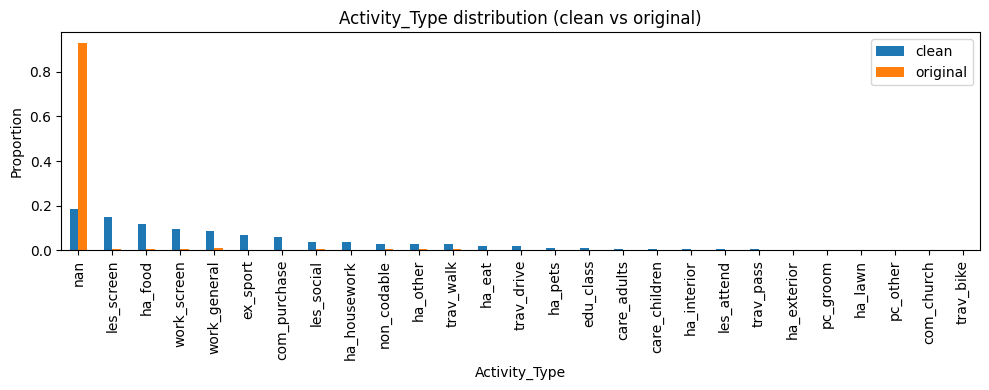


==== broad_domain ====


,clean,original
broad_domain,,
household_personal,0.212013,0.019597
work_education,0.187382,0.014745
NaN,0.185729,0.000000
Leisure_Screen,0.147532,0.005708
exercise,0.069065,0.003139
purchase_other,0.057122,0.002473
leisure,0.042887,0.007515
non_codable,0.028399,0.006088
active_transportation,0.027560,0.005518


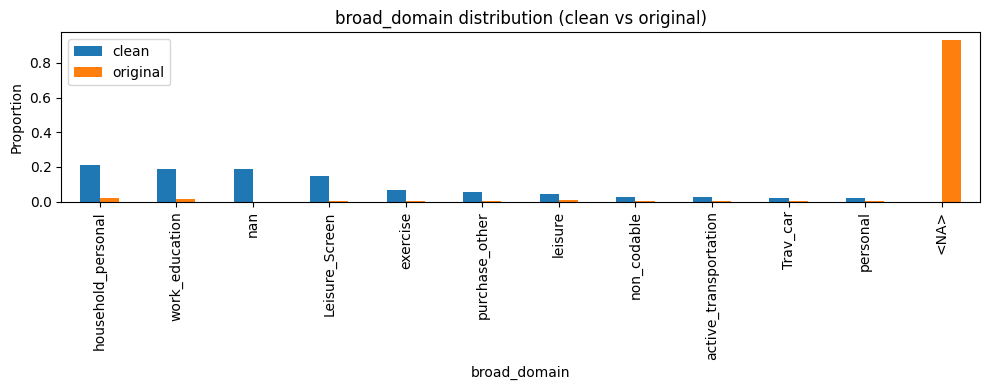


==== waves_domain ====


,clean,original
waves_domain,,
leisure,0.259484,0.016362
household,0.203987,0.017504
work_education,0.187382,0.014745
NaN,0.185729,0.000000
purchase_other,0.057122,0.002473
transportation,0.048913,0.008086
non_codable,0.028399,0.006088
household_personal,0.020959,0.002188
maintenance_repair,0.006483,0.000381


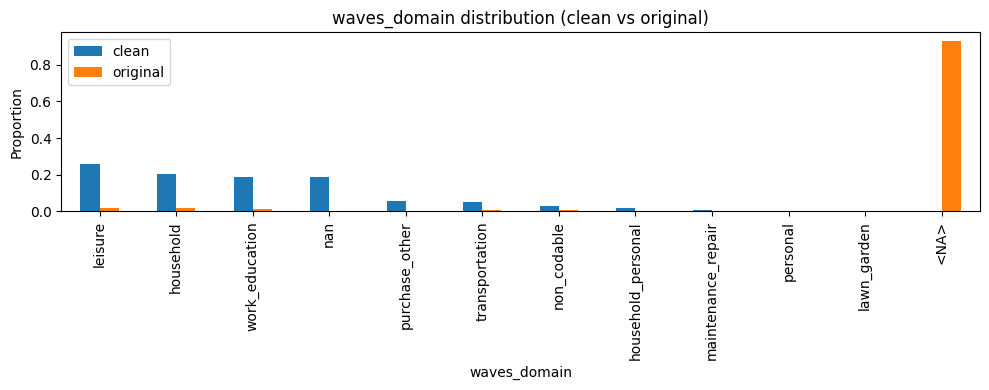


==== posture_wbm ====


,clean,original
posture_wbm,,
sitting,0.429027,0.208428
stand,0.275776,0.305175
stand_move,0.083201,0.251712
walk,0.077935,0.075247
walk_load,0.041302,0.034722
not_coded,0.031777,0.009798
running,0.020624,0.005327
biking,0.014407,0.006183
NaN,0.010973,0.069540


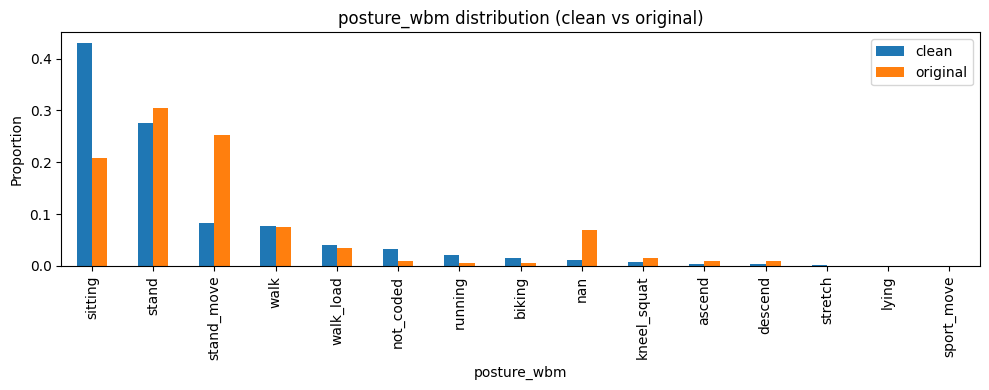


==== posture_broad ====


,clean,original
posture_broad,,
waves_sedentary,0.429027,0.208428
active,0.276813,0.305746
mixed_move,0.083201,0.251712
walk,0.077935,0.075247
mod_walk,0.047231,0.052702
not_coded,0.031777,0.009798
running,0.020624,0.005327
biking,0.014407,0.006183
NaN,0.010973,0.000000


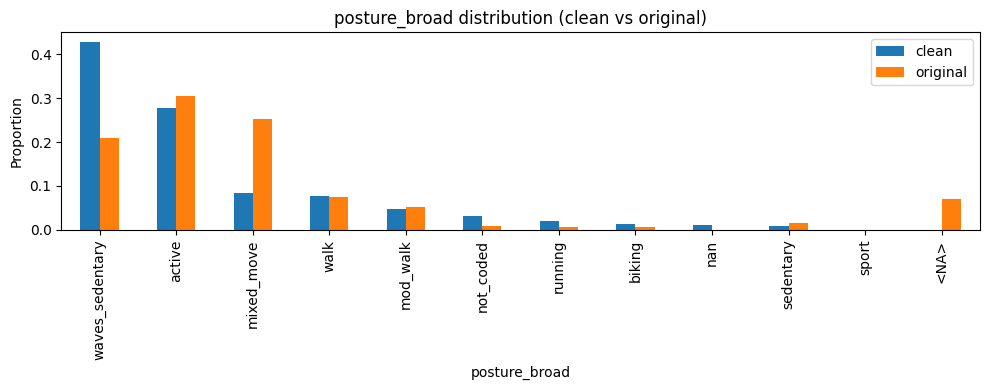


==== posture_waves ====


,clean,original
posture_waves,,
sedentary,0.415417,0.208904
stand_move,0.275776,0.305175
active,0.275181,0.401065
sed_drive,0.013898,0.000000
NaN,0.010973,0.000000
mixed_move,0.007717,0.014745
sport,0.001038,0.000571
<NA>,0.000000,0.069540


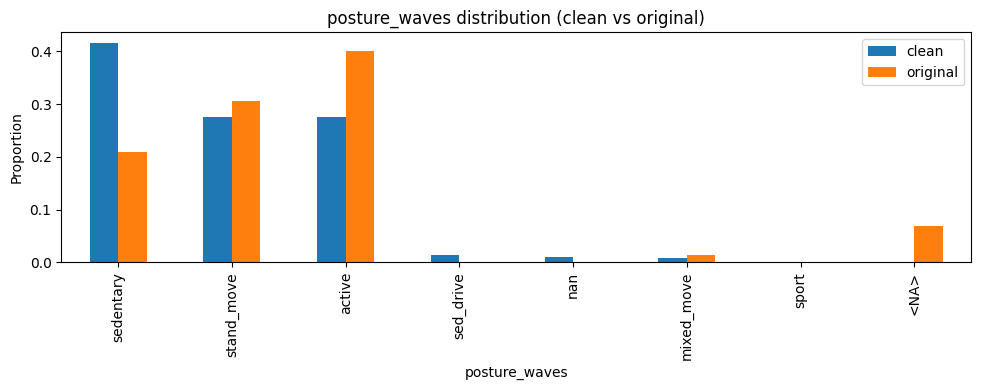

In [93]:
# Compare distributions between cleaned and original

def compare_counts(clean_df, gt_df, col, normalize=True):
    c = clean_df[col].value_counts(dropna=False, normalize=normalize)
    o = gt_df[col].value_counts(dropna=False, normalize=normalize)
    comp = pd.concat([c, o], axis=1)
    comp.columns = ["clean", "original"]
    comp = comp.fillna(0).sort_values("clean", ascending=False)
    return comp

cols_to_compare = [
    "Activity_Type",
    "broad_domain",
    "waves_domain",
    "posture_wbm",
    "posture_broad",
    "posture_waves",
]

for col in cols_to_compare:
    print("\n====", col, "====")
    comp = compare_counts(waves_df, behav_df, col, normalize=True)
    display(comp.head(30))

    ax = comp.plot(kind="bar", figsize=(10, 4), title=f"{col} distribution (clean vs original)")
    ax.set_ylabel("Proportion")
    plt.tight_layout()
    plt.show()

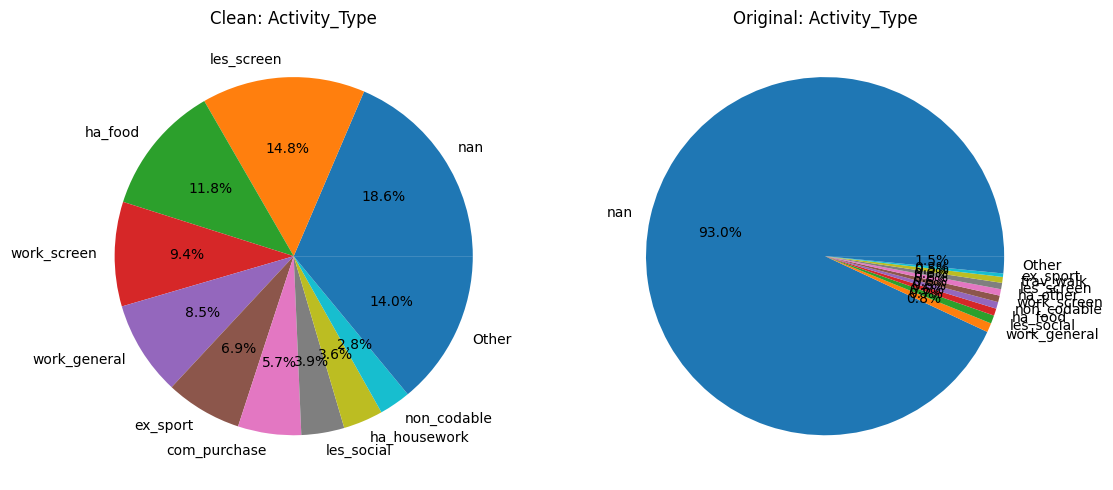

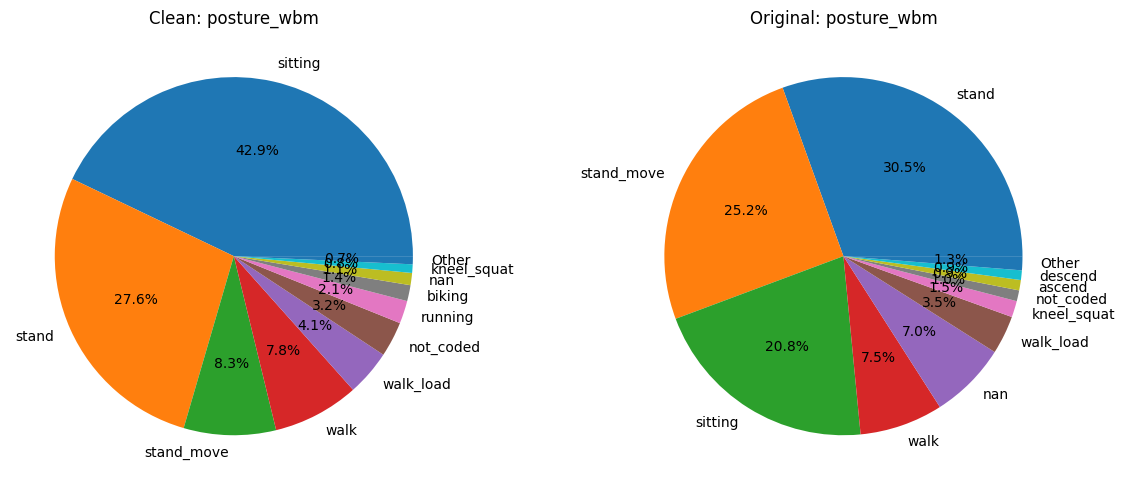

ValueError: Date ordinal 14937632.085569803 converts to 42867-11-06T02:03:13.230848 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function _draw_all_if_interactive at 0x0000020F384EADE0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal 14937632.085569803 converts to 42867-11-06T02:03:13.230848 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal 14937632.085569803 converts to 42867-11-06T02:03:13.230848 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 800x400 with 1 Axes>

In [94]:
# ------------------------------------------------------------
# Side-by-side pie charts + total time comparison
# ------------------------------------------------------------

import matplotlib.pyplot as plt


def pie_compare(clean_df, gt_df, col, top_n=10):
    c = clean_df[col].value_counts(dropna=False)
    o = gt_df[col].value_counts(dropna=False)

    def _prep(series):
        if len(series) > top_n:
            top = series.head(top_n)
            other = series.iloc[top_n:].sum()
            top = top.copy()
            top.loc["Other"] = other
            return top
        return series

    c = _prep(c)
    o = _prep(o)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].pie(c.values, labels=c.index, autopct="%1.1f%%")
    axes[0].set_title(f"Clean: {col}")
    axes[1].pie(o.values, labels=o.index, autopct="%1.1f%%")
    axes[1].set_title(f"Original: {col}")
    plt.tight_layout()
    plt.show()


# Pie charts for Activity_Type and posture_wbm
pie_compare(waves_df, behav_df, "Activity_Type", top_n=10)
pie_compare(waves_df, behav_df, "posture_wbm", top_n=10)

# Total time per Observation/session comparison
# Clean: span between min/max absolute time per do_session
waves_df["_abs_dt"] = pd.to_datetime(waves_df["date_time"], errors="coerce")
clean_session = (
    waves_df.groupby("do_session", dropna=False)["_abs_dt"]
    .agg(min_dt="min", max_dt="max")
)
clean_session["span_s"] = (clean_session["max_dt"] - clean_session["min_dt"]).dt.total_seconds()

# Original: span between min/max absolute time per Observation
behav_df["_abs_dt"] = pd.to_datetime(behav_df["Date_Time_Absolute_dmy_hmsf"], errors="coerce")
orig_session = (
    behav_df.groupby("Observation", dropna=False)["_abs_dt"]
    .agg(min_dt="min", max_dt="max")
)
orig_session["span_s"] = (orig_session["max_dt"] - orig_session["min_dt"]).dt.total_seconds()

plt.figure(figsize=(8, 4))
plt.hist(clean_session.dropna(), bins=30, alpha=0.6, label="Clean")
plt.hist(orig_session["span_s"].dropna(), bins=30, alpha=0.6, label="Original")
plt.title("Session duration comparison (seconds)")
plt.xlabel("Seconds")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

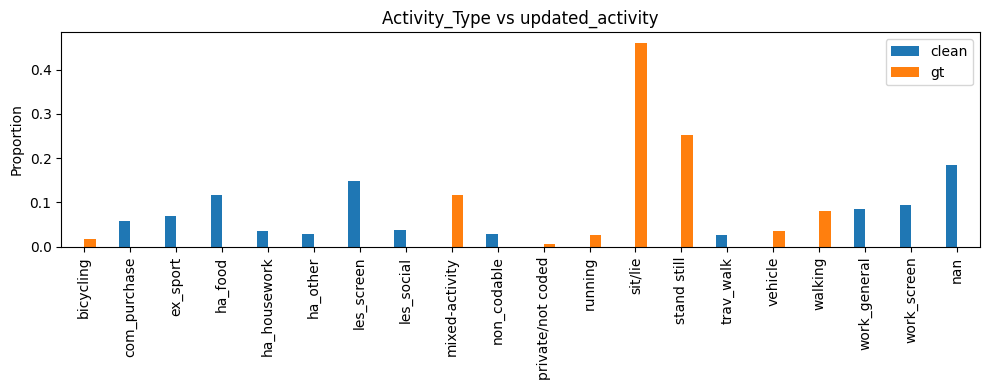

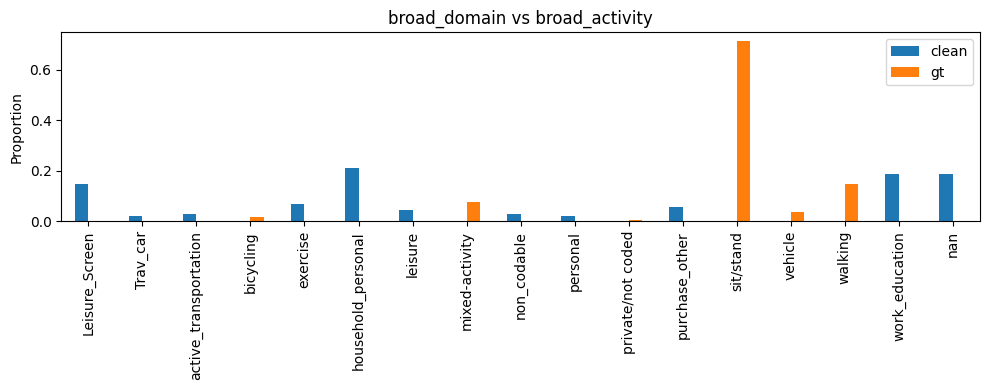

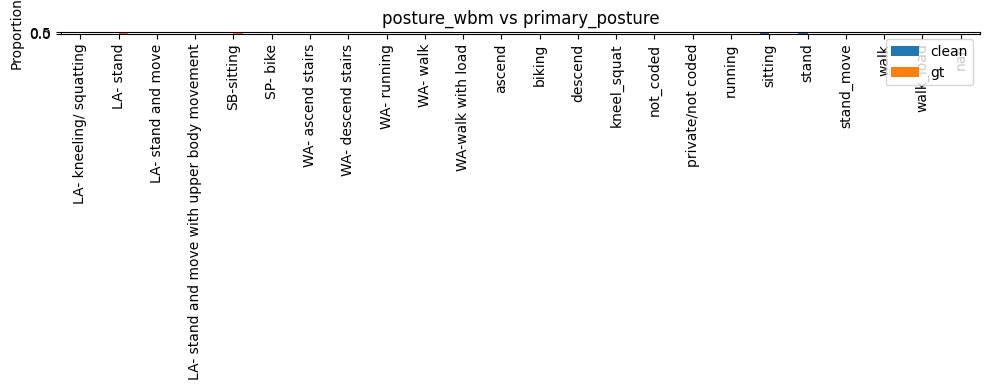

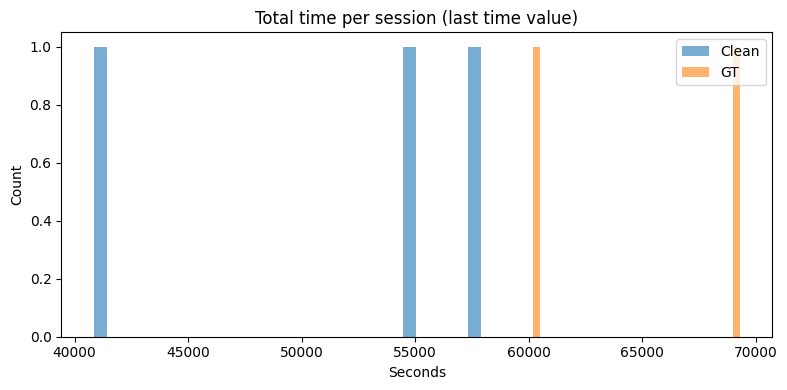

In [ ]:
# ------------------------------------------------------------
# Focused comparisons (only aligned variables + total time)
# ------------------------------------------------------------

# Aligned categorical comparisons
plot_top_bar(clean_df["Activity_Type"], gt_df["updated_activity"], "Activity_Type vs updated_activity")
plot_top_bar(clean_df["broad_domain"], gt_df["broad_activity"], "broad_domain vs broad_activity")
plot_top_bar(clean_df["posture_wbm"], gt_df["primary_posture"], "posture_wbm vs primary_posture")

# Total time per session: use last time value in each session
# Clean: last time per do_session based on date_time ordering
clean_df["_dt"] = pd.to_datetime(clean_df["date_time"], errors="coerce")
clean_last = (
    clean_df.sort_values(["do_session", "_dt"], kind="mergesort")
    .groupby("do_session", dropna=False)
    .tail(1)
)
clean_last_sec = pd.to_timedelta(clean_last["time"], errors="coerce").dt.total_seconds()

# GT: last actual_time per DO_session based on day+actual_time ordering
if "day" in gt_df.columns and "actual_time" in gt_df.columns and "DO_session" in gt_df.columns:
    gt_df["_dt"] = pd.to_datetime(gt_df["day"].astype(str) + " " + gt_df["actual_time"].astype(str), errors="coerce")
    gt_last = (
        gt_df.sort_values(["DO_session", "_dt"], kind="mergesort")
        .groupby("DO_session", dropna=False)
        .tail(1)
    )
    gt_last_sec = pd.to_timedelta(gt_last["actual_time"], errors="coerce").dt.total_seconds()
else:
    gt_last_sec = pd.Series(dtype=float)

plt.figure(figsize=(8, 4))
plt.hist(clean_last_sec.dropna(), bins=30, alpha=0.6, label="Clean")
plt.hist(gt_last_sec.dropna(), bins=30, alpha=0.6, label="GT")
plt.title("Total time per session (last time value)")
plt.xlabel("Seconds")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()